# Requirements
In this "section, you'll create a Python script to visualize the weather of 500+ cities of varying distance from the equator. To do so, you'll use a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and your problem-solving skills to create a representative model of weather across cities.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeated) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed, with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

## Setup

In [43]:
# Import dependencies.
import numpy as np
from citipy import citipy
import requests
import pandas as pd

# Import OpenWeatherMap API key
from api_keys import owm_key

> Randomly select at least 500 unique (non-repeated) cities based on latitude and longitude.

In [21]:
cntr = 0
city_ccs = []

while cntr < 500:
    lat = round(np.random.uniform(-90, 90), 2) # Latitude values: -90 (South Pole) to 90 (North Pole)
    lon = round(np.random.uniform(-180, 180), 2) # Longitude values: -180 (West) to 180 (East)

    city_inst = citipy.nearest_city(lat, lon)
    city = city_inst.city_name.title()
    cc = city_inst.country_code
    city_cc = (city, cc)

    if city_cc not in city_ccs:
        city_ccs.append(city_cc)

        cntr += 1

In [22]:
# Check city count to confirm sufficient count of cities (i.e., 500).
len(city_ccs)

500

> Perform a weather check on each of the cities using a series of successive API calls. Include a print log of each city as it's being processed, with the city number and city name.

In [39]:
# Use built-in API request by city name: https://api.openweathermap.org/data/2.5/weather?q={city name},{country code}&appid={API key}
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

ctys = []
lats = []
lons = []
temps = []
humids = []
clouds = []
wind_spds = []
ccs = []
dts = []

cntr = 1

for city_cc in city_ccs:
    params = {
        'q': f"{city_cc[0]},{city_cc[1]}",
        'units': 'imperial',
        'appid': owm_key
    }

    owm_response = requests.get(base_url, params=params).json()

    try:
        ctys.append(owm_response['name'])
        lats.append(owm_response['coord']['lat'])
        lons.append(owm_response['coord']['lon'])
        temps.append(owm_response['main']['temp'])
        humids.append(owm_response['main']['humidity'])
        clouds.append(owm_response['clouds']['all'])
        wind_spds.append(owm_response['wind']['speed'])
        ccs.append(owm_response['sys']['country'])
        dts.append(owm_response['dt'])

        print(f"Processing City {cntr}: {city_cc[0]}")

        cntr += 1
    except:
        print('City not found. Moving on to the next city...')

print('Current Weather Data Retrieval Complete!')

Processing City 1: Cabedelo
Processing City 2: Albany
Processing City 3: Vrangel
City not found. Moving on to the next city...
Processing City 4: Avarua
City not found. Moving on to the next city...
Processing City 5: Verkhnevilyuysk
Processing City 6: Mahebourg
Processing City 7: Hermanus
Processing City 8: Norman Wells
City not found. Moving on to the next city...
Processing City 9: Boyuibe
Processing City 10: Hvide Sande
City not found. Moving on to the next city...
Processing City 11: Port Alfred
Processing City 12: Caravelas
Processing City 13: Areosa
Processing City 14: Kaitangata
Processing City 15: Viedma
Processing City 16: Moissala
Processing City 17: Vila Franca Do Campo
Processing City 18: Cidreira
Processing City 19: Ancud
Processing City 20: Ushuaia
Processing City 21: Shimoda
Processing City 22: Cherskiy
Processing City 23: Thinadhoo
Processing City 24: Chicama
City not found. Moving on to the next city...
Processing City 25: Tulsipur
Processing City 26: Hithadhoo
City n

City not found. Moving on to the next city...
Processing City 225: Tura
Processing City 226: Madras
Processing City 227: Ulaanbaatar
Processing City 228: Mount Darwin
Processing City 229: West Plains
Processing City 230: Henties Bay
Processing City 231: Vredendal
Processing City 232: Guican
Processing City 233: Hamilton
Processing City 234: Vinh
Processing City 235: Muros
Processing City 236: Paamiut
Processing City 237: Petropavlovsk-Kamchatskiy
Processing City 238: Bonavista
Processing City 239: Pandan
Processing City 240: Bethel
Processing City 241: Souillac
Processing City 242: Mayor Pablo Lagerenza
City not found. Moving on to the next city...
Processing City 243: Vila Velha
Processing City 244: Gilgit
Processing City 245: Saint-Pierre
Processing City 246: Kununurra
Processing City 247: Palma Di Montechiaro
Processing City 248: Arlit
Processing City 249: Castro
Processing City 250: Vaitape
City not found. Moving on to the next city...
Processing City 251: Lagoa
Processing City 252

In [40]:
# Check new list lengths of cities and current weather data.
print(f"Ctys: {len(ctys)}")
print(f"Lats: {len(lats)}")
print(f"Lons: {len(lons)}")
print(f"Temps: {len(temps)}")
print(f"Humids: {len(humids)}")
print(f"Clouds: {len(clouds)}")
print(f"Wind Spds: {len(wind_spds)}")
print(f"CCs: {len(ccs)}")
print(f"Dates: {len(dts)}")

Ctys: 445
Lats: 445
Lons: 445
Temps: 445
Humids: 445
Clouds: 445
Wind Spds: 445
CCs: 445
Dates: 445


In [70]:
# Convert lists into DataFrame.
df_dict = {
    'City': ctys,
    'Latitude': lats,
    'Longitude': lons,
    'Temperature': temps,
    'Humidity': humids,
    'Cloudiness': clouds,
    'Wind Speed': wind_spds,
    'Country Code': ccs,
    'Date': dts
}

cur_wx_df = pd.DataFrame(df_dict)
cur_wx_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country Code,Date
0,Cabedelo,-6.9811,-34.8339,77.67,77,32,10.40,BR,1667788529
1,Albany,-35.0169,117.8917,60.24,81,100,13.04,AU,1667789000
2,Vrangel',42.7297,133.0839,47.66,64,90,9.46,RU,1667789001
3,Avarua,-21.2078,-159.7750,77.05,65,75,6.91,CK,1667789001
4,Verkhnevilyuysk,63.4453,120.3167,-8.97,92,7,2.51,RU,1667789002


> Save a CSV of all retrieved data.

In [71]:
cur_wx_df.to_csv('WeatherPy/Current_Weather_by_City', index = False)

## First Requirement: Create a Series of Scatter Plots.

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

> Save a PNG image for each scatter plot.

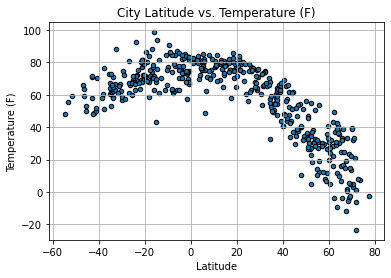

In [74]:
lat_vs_temp_scatter = cur_wx_df.plot(
    x = 'Latitude',
    y = 'Temperature',
    kind = 'scatter',
    ylabel = 'Temperature (F)',
    title = 'City Latitude vs. Temperature (F)',
    grid = True,
    edgecolors = 'black'
)

lat_vs_temp_scatter.get_figure().savefig('WeatherPy/Lat_vs_Temp_Scatter.png')

The "City Latitude vs. Temperature (F)" scatter plot plots 445 recorded temperatures for the randomized list of unique cities by their latitude. Generally, it looks that cities closest to the equator (i.e., latitude of 0) recorded the highest temperatures.

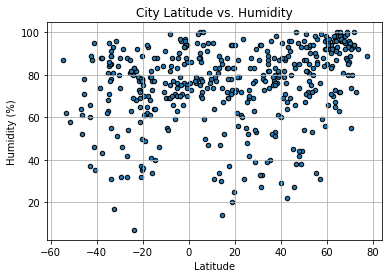

In [75]:
lat_vs_humid_scatter = cur_wx_df.plot(
    x = 'Latitude',
    y = 'Humidity',
    kind = 'scatter',
    ylabel = 'Humidity (%)',
    title = 'City Latitude vs. Humidity',
    grid = True,
    edgecolors = 'black'
)

lat_vs_humid_scatter.get_figure().savefig('WeatherPy/Lat_vs_Humid_Scatter.png')

The "City Latitude vs. Humidity" scatter plot plots 445 recorded humidity percentages for the randomized list of unique cities by their latitude. Generally, the majority of cities recorded humidity %s that hovered over 60%.

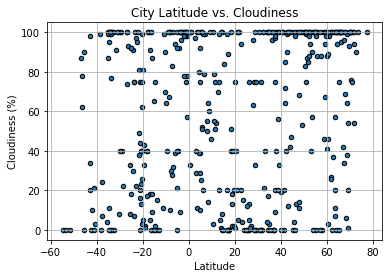

In [76]:
lat_vs_cloud_scatter = cur_wx_df.plot(
    x = 'Latitude',
    y = 'Cloudiness',
    kind = 'scatter',
    ylabel = 'Cloudiness (%)',
    title = 'City Latitude vs. Cloudiness',
    grid = True,
    edgecolors = 'black'
)

lat_vs_cloud_scatter.get_figure().savefig('WeatherPy/Lat_vs_Cloud_Scatter.png')

The "City Latitude vs. Cloudiness" scatter plot plots 445 recorded cloudiness percentages for the randomized list of unique cities by their latitude. Generally, the majority of cities recorded cloudiness %s at either 0% or 100%.

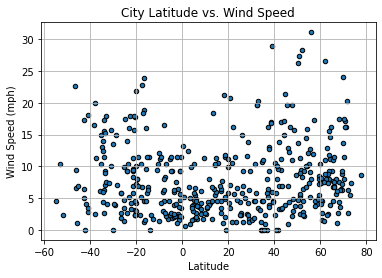

In [77]:
lat_vs_wind_scatter = cur_wx_df.plot(
    x = 'Latitude',
    y = 'Wind Speed',
    kind = 'scatter',
    ylabel = 'Wind Speed (mph)',
    title = 'City Latitude vs. Wind Speed',
    grid = True,
    edgecolors = 'black'
)

lat_vs_wind_scatter.get_figure().savefig('WeatherPy/Lat_vs_Wind_Scatter.png')

The "City Latitude vs. Wind Speed" scatter plot plots 445 recorded wind speeds for the randomized list of unique cities by their latitude. Generally, the majority of cities recorded wind speeds below 10 mph.

## Second Requirement: Compute the Linear Regression for Each Relationship. 
This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

## References
- [Geographic Coordinate Systems](https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm)
- [citipy GitHub](https://github.com/wingchen/citipy)
- [Current Weather Data on OpenWeatherMap API](https://openweathermap.org/current)